<h1 align="center">EVALUATION</h1>
<h2 align="left"><ins>Lesson Guide</ins></h2>


- [**BASELINE MODELS**](#base)
- [**EVALUATE PERFORMANCE OF MACHINE LEARNING ALGORITHMS WITH RESAMPLING**](#resample)
    - [**Problem With Naive Data Preparation**](#problem)
    - [**Data Preparation Without Data Leakage**](#leak)
    - [**Resampling With Train and Test Sets**](#train)
    - [**Resampling With k-fold Cross-Validation**](#kfold)
    - [**Resampling With Leave-One-Out Cross-Validation**](#leave)
    - [**Resampling With Repeated Random Test-Train Splits**](#repeat)
    - [**How to Choose a Resampling Method**](#resamp)
- [**MACHINE LEARNING ALGORITHM PERFORMANCE METRICS**](#metrics)
    - [**Classification Metrics**](#class)
        - [**Classification Accuracy**](#acc)
        - [**Logarithmic Loss**](#log)
        - [**Area Under ROC Curve**](#roc)
        - [**Confusion Matrix**](#matrix)
        - [**Classification Report**](#report)
    - [**Regression Metrics**](#reg)
        - [**Mean Absolute Error**](#mae)
        - [**Mean Squared Error**](#mse)
        - [**Root Mean Squared Error**](#rmse)
        - [**R-squared $R^2$**](#squared)
    - [**Spot-Check Machine Learning Algorithms**](#ml)
        - [**Classification Models**](#spot)
        - [**Regression Models**](#check)
- [**AUTOMATE MACHINE LEARNING WORKFLOWS WITH PIPELINES**](#auto)
    - [**Data Preparation and Modeling Pipeline**](#pipe)
    - [**Feature Extraction and Modeling Pipeline**](#extract)
- [**IMPROVE PERFORMANCE WITH ENSEMBLES**](#ensemble)
    - [**Bagging Algorithms**](#bag)
        - [**Bagged Decision Trees**](#bagtree)
        - [**Random Forest**](#forest)
        - [**Extra Trees**](#extra)
    - [**Boosting Algorithms**](#boost)
        - [**AdaBoost**](#ada)
        - [**Stochastic Gradient Boosting**](#gradient)
    - [**Voting Ensemble**](#vote)
- [**IMPROVE PERFORMANCE WITH ALGORITHM TUNING**](#tune)
   - [**Grid Search Parameter Tuning**](#grid)
   - [**Random Search Parameter Tuning**](#random)
- [**SAVE AND LOAD MACHINE LEARNING MODELS**](#save)
    - [**Finalize Your Model with pickle**](#pickle)
    - [**Finalize Your Model with Joblib**](#joblib)
- [**REFERENCES**](#ref)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

<a id="base"></a>
<h2 align="center">BASELINE MODELS</h2>

With hundreds of machine learning algorithms to choose from. How do you know whether the predictions for a given algorithm are good or not? The answer is to use a **baseline prediction algorithm**.

When doing supervised learning, a simple sanity check consists of comparing one’s estimator against simple rules of thumb that can be used as a baseline model to provide a point of comparison for the more advanced algorithms.

A baseline model uses heuristics, simple summary statistics, randomness, or machine learning to create predictions from a dataset. These predictions can be evaluated using metrics such as classification accuracy or RMSE. The scores from these baseline algorithms provide the required point of comparison when evaluating all other machine learning algorithms. Once established, we can comment on how much better a given algorithm is compared to the naive baseline algorithm, providing context on just how good a given method actually is.

The two commonly used baseline methods are:
- **Random Prediction Algorithm** - predicts a random (distinct) outcome.
- **Zero Rule Algorithm** - uses more information about a given problem to create one rule in order to make predictions. This rule is different depending on the problem type. 
    - For **classification** problems, the one rule is to predict the class value that is most common in the training dataset. 
    - Regression problems require the prediction of a real value. A good default prediction for real values is to predict the central tendency. This could be the mean or the median. This is likely to have a lower error than random prediction which will return any observed output value.

When starting on a new problem that is more difficult than a conventional classification or regression problem, it is a good idea to first devise a random prediction algorithm that is specific to the prediction problem. Later you can improve upon this and devise a zero rule algorithm.

Besides using the mean or the value counts as a baseline model, we can also use [scikit learn](https://scikit-learn.org/stable/modules/model_evaluation.html#dummy-estimators) to perform this for both classification and regression problems. 

**`DummyClassifier`** for classification baselines
- **stratified** generates random predictions by respecting the training set class distribution.
- **most_frequent** always predicts the most frequent label in the training set.
- **prior** always predicts the class that maximizes the class prior (like most_frequent) and `predict_proba` returns the class prior.
- **uniform** generates predictions uniformly at random.
- **constant** always predicts a constant label that is provided by the user. 

A major motivation of this method is F1-scoring, when the positive class is a minority.

**`DummyRegressor`** for regression baselines
- **mean** always predicts the mean of the training targets.
- **median** always predicts the median of the training targets.
- **quantile** always predicts a user provided quantile of the training targets.
- **constant** always predicts a constant value that is provided by the user.

>**Note that with all these strategies, the predict method completely ignores the input data**

Let's look at a couple of examples to gain a better understaing.

In [2]:
# time spent in sport (hrs)
x = np.array([2,4,8,6,1,4,3,6,0,1])

# scores in a test
y = np.array([41, 59,  7, 24, 74, 28, 40, 29, 78, 55])

# Method 1 - converting data into a dictionary
# d = {'Play_sport(hrs)':x,'Test_scores':y}
# df = pd.DataFrame(data=d)

# Method 2 - joining 2 dataframes
# df1 = pd.DataFrame(x, columns=['Play_sport(hrs)'])
# df2 = pd.DataFrame(y, columns=['Test_scores'])
# df = df1.join(df2)

# Method 3 - this method only works if we transpose the data first
# df = pd.DataFrame(data=[x,y]).T
# df.columns = ['Play_sport(hrs)','Test_scores']

# Method 4 - applying numpy's horizontal stack method
# df = pd.DataFrame(data=np.hstack((x[:,None],y[:,None])),
#                   columns = ['Play_sport(hrs)','Test_scores'])

# Method 5 - starting with an empty dataframe
df = pd.DataFrame()
df['Play_sport(hrs)'] = x
df['Test_scores'] = y

df.head(2)

,Play_sport(hrs),Test_scores
0,2,41
1,4,59


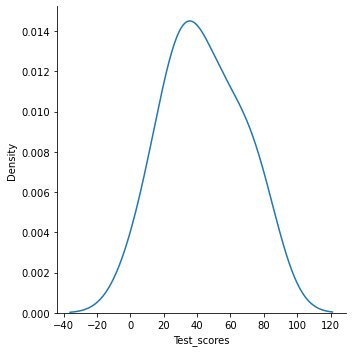

In [3]:
# distribution plot of the test scores (the blue bars and blue line)
sns.displot(df['Test_scores'], label='distribution', kind='kde')

[(-40.0, 120.0)]

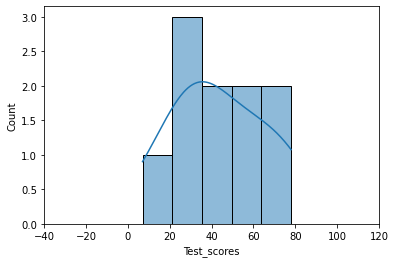

In [4]:
plot = sns.histplot(df['Test_scores'], label='distribution', kde=True)
plot.set(xlim=(-40, 120))

C:\Users\Michael\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Test_scores', ylabel='Density'>

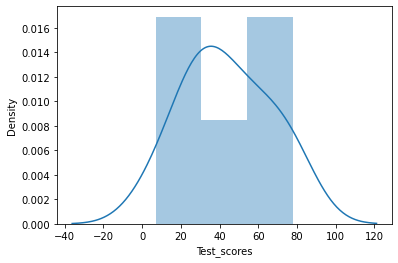

In [5]:
# distribution plot of the test scores (the blue bars and blue line)
sns.distplot(df['Test_scores'], label='distribution')

C:\Users\Michael\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


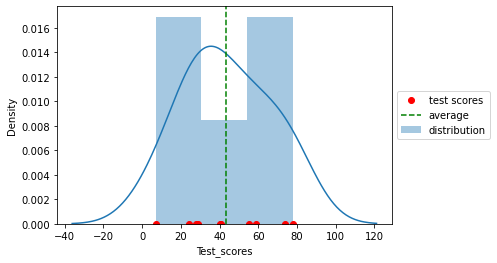

In [6]:
# distribution plot of the test scores (the blue bars and blue line)
sns.distplot(df['Test_scores'], label='distribution')

# plotting the test scores along the x-axis (the red dots)
plt.plot(df['Test_scores'], np.zeros_like(y), 'o', color='r', label='test scores')

# plotting the mean test score horizontally (green dashed line)
plt.axvline(np.mean(df['Test_scores']),linestyle='--',color='g', label='average')

# putting the labels outside the chart
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In the following illustration, we can see that the red line is the baseline model being compared to the the blue line (the regression line).

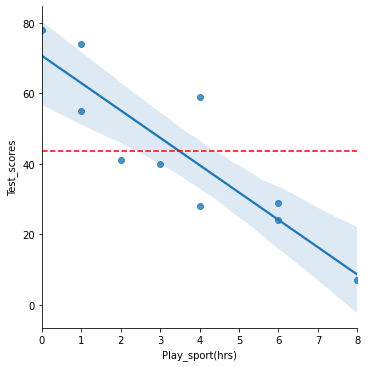

In [7]:
sns.lmplot(data=df, x='Play_sport(hrs)', y='Test_scores')

plt.axhline(df['Test_scores'].mean(), color='r', ls='--')

In this example, using the Iris dataset from sklearn, we can see that the baseline accuracy is around 60% while the SVC model's accuracy was improved to 95%. 

In [8]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.svm import SVC

In [9]:
X, y = load_iris(return_X_y=True)
y[y != 1] = -1    # this is done to create an imbalanced dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

clf_base = DummyClassifier(strategy='most_frequent', random_state=0)
clf_base.fit(X_train, y_train)
print(f"Baseline score is: {clf_base.score(X_test, y_test)}")

clf_model1 = SVC(kernel='linear', C=1).fit(X_train, y_train)
clf_model1.score(X_test, y_test)
print(f"SVC score is: {clf_model1.score(X_test, y_test)}")

clf_model2 = SVC(kernel='rbf', C=1).fit(X_train, y_train)
clf_model2.score(X_test, y_test)
print(f"SVC score is: {clf_model2.score(X_test, y_test)}")

Baseline score is: 0.5789473684210527
SVC score is: 0.631578947368421
SVC score is: 0.9473684210526315


When the accuracy of a classifier is too close to random, it probably means that something went wrong: features are not helpful, a hyperparameter is not correctly tuned, the classifier is suffering from class imbalance, etc…

<a id="resample"></a>
<h2 align="center">EVALUATE PERFORMANCE OF MACHINE LEARNING ALGORITHMS WITH RESAMPLING</h2>

The goal of predictive modeling is to create models that make good predictions on new data. Thus, it is important to know how well these machine learning algorithms perform on unseen data. The best way to evaluate the performance of an algorithm would be to make predictions for new data to which we already know the answers. The second best way is to use clever techniques from statistics called **resampling methods**, as they are resampling the available training data. The goal of resampling methods is to make the best use of the training data in order to accurately estimate the performance of a model on new unseen data. Accurate estimates of performance can then be used to help choose which set of model parameters to use or which model to select. Once we estimate the performance of our algorithm, we can then re-train the final algorithm on the entire training dataset and get it ready for operational use.

So why can’t we train a machine learning algorithm on the dataset and use predictions from this same dataset to evaluate machine learning algorithms? The simple answer is **overfitting**.<br>
$\;\;\;\;\;\;\;$Imagine an algorithm that remembers every observation it is shown during training. If we evaluated a machine learning algorithm on the same dataset used to train the algorithm, then an algorithm like this would have a perfect score on the training dataset. But the predictions it made on new data would be terrible.<br>
$\;\;\;\;\;\;\;$We must evaluate the machine learning algorithms on data that is not used to train the algorithm. This evaluation is an estimate that we can use to talk about how well we think the algorithm may actually do in practice. However, it is not a guarantee of performance. 

Some common resampling techniques that we can use to split up the training dataset and create useful estimates of performance for machine learning algorithms:
- **Train and Test Sets**
- **k-fold Cross Validation**
- **Leave One Out Cross Validation**
- **Repeated Random Test-Train Splits**

<a id="problem"></a>
<h3><ins>Problem With Naive Data Preparation</ins></h3>

Data preparation is the process of transforming raw data into a form that is appropriate for modeling. The manner in which data preparation techniques are applied to data significantly matters.<br>
$\;\;\;\;\;\;\;$A naive approach to preparing data is to first apply any transforms to the entire dataset. The transformed dataset is then either split into train and test sets or k-fold cross-validation is used to fit and evaluate a machine learning model.<br>
$\;\;\;\;\;\;\;$Although this is a common approach, it is dangerously incorrect in most cases. The problem with applying data preparation techniques before splitting data for model evaluation is that it can lead to **data leakage** and, in turn, will *likely result in an incorrect estimate of a model’s performance on the problem.* Data leakage refers to a problem where knowledge/information about the holdout dataset, such as a test or validation dataset, is made available to (or leaks into) the model in the training phase. *This leakage is often small and subtle but can have a marked effect on performance.*
>A careful application of data preparation techniques is required in order to avoid data leakage, and this varies depending on the model evaluation scheme used, such as **train test splits** or **k-fold cross-validation**.

<a id="leak"></a>
<h3><ins>Data Preparation Without Data Leakage</ins></h3>

We get data leakage by applying data preparation techniques to the entire dataset. This is not a direct type of data leakage, where we would train the model on the test dataset. Instead, it is an indirect type of data leakage, where some knowledge about the test dataset, captured in summary statistics is available to the model during training. This can make it a harder type of data leakage to spot, especially for beginners. For example:
- Consider the case where we want to normalize data, that is scale input variables to the range 0-1. This requires that we first calculate the minimum and maximum values for each variable before using these values to scale the variables. The dataset is then split into train and test datasets. But, the examples in the training dataset know something about the data in the test dataset; they have been scaled by the global minimum and maximum values, so they know more about the global distribution of the variable then they should.
- We get the same type of leakage with almost all data preparation techniques; for example, standardization estimates the mean and standard deviation values from the domain in order to scale the variables.
- Even models that impute missing values using a model or summary statistics will draw on the full dataset to fill in values in the training dataset. 

**The solution is straightforward.** Data preparation must be fit on the training dataset only. That is, any coefficients or models prepared for the data preparation process must only use rows of data in the training dataset. Once fit, the data preparation algorithms or models can then be applied to the training dataset, and to the test dataset.

1. Split Data.
2. Fit Data Preparation on Training Dataset.
3. Apply Data Preparation to Train and Test Datasets.
4. Evaluate Models.

>**More generally, the entire modeling pipeline must be prepared only on the training dataset to avoid data leakage. This might include data transforms, but also other techniques such as feature selection, dimensionality reduction, feature engineering and more.**

<a id="train"></a>
<h3><ins>Resampling With Train and Test Sets</ins></h3>

The **train and test split** is the easiest resampling method we can use to evaluate the performance of a machine learning algorithm. As such, it is the most widely used. The correct approach to performing data preparation with a train-test split evaluation is to first split the data, fit the data preparation on the training set, then apply the transform to the train and test sets.<br>
$\;\;\;\;\;\;\;$This algorithm evaluation technique is very fast and ideal for large datasets (millions of records) where there is strong evidence that both splits of the data are representative of the underlying problem. Because of the speed, it is useful to use this approach when the algorithm under investigaton is slow to train. A downside of this technique is that it can have a high variance. This means that differences in the training and test dataset can result in meaningful differences in the estimate of accuracy.

If multiple algorithms are compared or multiple configurations of the same algorithm are compared, the same train and test split of the dataset should be used. This is to ensure that the comparison of performance is consistent or apples-to-apples. We can achieve this by seeding the random number generator the same way before splitting the data, or by holding the same split of the dataset for use by multiple algorithms.

In [10]:
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# define dataset
X, y = make_classification(n_samples=1000, n_features=20,
                           n_informative=15, n_redundant=5, random_state=7)

In [11]:
# Naive Approach - scale then split

# prepare and transform the data
scaler_incorrect = MinMaxScaler()
X_nay = scaler_incorrect.fit_transform(X)

# split the data
X_train, X_test, y_train, y_test = train_test_split(X_nay, y, test_size=0.33,
                                                    random_state=1)
# fit the model
model = LogisticRegression()
model.fit(X_train,y_train)

# evaluate the model
yhat = model.predict(X_test)
accuracy = accuracy_score(y_test, yhat)
print(f'Accuracy with the Naive Approach: {accuracy*100:.4f}')

Accuracy with the Naive Approach: 84.8485


In [12]:
# Correct Approach - split then scale

# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,
                                                    random_state=1)
# prepare and transform the data
scaler_correct = MinMaxScaler()
scaler_correct.fit(X_train)
X_train_cor = scaler_correct.transform(X_train)
X_test_cor = scaler_correct.transform(X_test)

# fit the model
model = LogisticRegression()
model.fit(X_train_cor, y_train)

# evaluate the model
yhat = model.predict(X_test_cor)
accuracy = accuracy_score(y_test, yhat)
print(f'Accuracy with the Correct Approach: {accuracy*100:.4f}')

Accuracy with the Correct Approach: 85.4545


<a id="kfold"></a>
<h3><ins>Resampling With k-fold Cross-Validation</ins></h3>

A limitation of using the train and test split method is that you get a noisy estimate of algorithm performance. The **k-fold cross-validation** resampling procedure generally gives a more accurate and reliable estimate of model performance with less variance than a train-test split, although it is more computationally expensive given the repeated fitting and evaluation of models.<br>
$\;\;\;\;\;\;\;$Data preparation without data leakage when using cross-validation is slightly more challenging. It requires that the data preparation method is prepared on the training set and applied to the train and test sets within the cross-validation procedure, e.g. the groups of folds of rows. We can achieve this by defining a modeling **pipeline** that defines a sequence of data preparation steps to perform and ending in the model to fit and evaluate.

k-fold cross-validation involves splitting the dataset into $k$ non-overlapping groups of rows. The algorithm is then trained on all but one group to form a training dataset and then evaluated on the held-out fold. This process is repeated $k$ times so that each fold is given a chance to be used as the holdout test set. Finally, the average performance across all evaluations is reported. 
>**The choice of $k$ must allow the size of each test partition to be large enough to be a reasonable sample of the problem, whilst allowing enough repetitions of the train-test evaluation of the algorithm to provide a fair estimate of the algorithms performance on unseen data. A good default to use is $k=3$ for a small dataset or $k=10$ for a larger dataset. A quick way to check if the fold sizes are representative is to calculate summary statistics such as mean and standard deviation and see how much the values differ from the same statistics on the whole dataset.**

In [13]:
from sklearn.model_selection import (cross_val_score, RepeatedStratifiedKFold,
                                     KFold)
from sklearn.pipeline import Pipeline

In [14]:
# naive data preparation for model evaluation with k-fold cross-validation

# standardize the dataset
scaler = MinMaxScaler()
X_nay = scaler.fit_transform(X)

# define the model
model = LogisticRegression()

# define the evaluation procedure
cv = KFold(n_splits=10, shuffle=False, random_state=None)

# evaluate the model using cross-validation
scores = cross_val_score(model, X_nay, y, scoring='accuracy', 
                         cv=cv, n_jobs=-1)

# report performance
print('Accuracy using Naive Approach: %.3f (%.3f)' % (np.mean(scores)*100,
                                                        np.std(scores)*100))

Accuracy using Naive Approach: 85.200 (1.720)


In [15]:
# correct data preparation for model evaluation with k-fold cross-validation

# define the pipeline
steps = [('scaler', MinMaxScaler()), ('model', LogisticRegression())]
pipeline = Pipeline(steps=steps)

# define the evaluation procedure
cv = KFold(n_splits=10, shuffle=False, random_state=None)

# evaluate the model using cross-validation
scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

# report performance
print('Accuracy using Correct Approach with KFold: %.3f (%.3f%%)' % (np.mean(scores)*100,
                                                                   np.std(scores)*100))

Accuracy using Correct Approach with KFold: 84.900 (1.814%)


In [16]:
# correct data preparation for model evaluation with k-fold cross-validation

# define the pipeline
steps = [('scaler', MinMaxScaler()), ('model', LogisticRegression())]
pipeline = Pipeline(steps=steps)

# define the evaluation procedure
cv = KFold(n_splits=10, shuffle=True, random_state=1)

# evaluate the model using cross-validation
scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

# report performance
print('Accuracy using Correct Approach with KFold: %.3f (%.3f%%)' % (np.mean(scores)*100,
                                                                   np.std(scores)*100))

Accuracy using Correct Approach with KFold: 85.100 (2.211%)


In the following example we will use repeated stratified 10-fold cross-validation, which is a best practice for classification. Repeated means that the whole cross-validation procedure is repeated multiple times, three in this case. Stratified means that each group of rows will have the relative composition of examples from each class as the whole dataset. We will use k = 10 or 10-fold cross-validation. This can be achieved using the **RepeatedStratifiedKFold** which can be configured to three repeats and 10 folds, and then using the `cross val score()` function to perform the procedure, passing in the defined model, cross-validation object, and metric to calculate, in this case, accuracy.

In [17]:
# naive data preparation for model evaluation with 
# repeated stratified k-fold cross-validation

# standardize the dataset
scaler = MinMaxScaler()
X_nay = scaler.fit_transform(X)

# define the model
model = LogisticRegression()

# define the evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# evaluate the model using cross-validation
scores = cross_val_score(model, X_nay, y, scoring='accuracy', cv=cv, n_jobs=-1)

# report performance
print('Accuracy using Naive Approach: %.3f (%.3f)' % (np.mean(scores)*100,
                                                        np.std(scores)*100))

Accuracy using Naive Approach: 85.300 (3.607)


In [18]:
# correct data preparation for model evaluation with 
# repeated stratified k-fold cross-validation

# define the pipeline
steps = [('scaler', MinMaxScaler()), ('model', LogisticRegression())]
pipeline = Pipeline(steps=steps)

# define the evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# evaluate the model using cross-validation
scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

# report performance
print('Accuracy using Correct Approach with RepeatedStratifiedKFold: %.3f (%.3f)' % (np.mean(scores)*100,
                                                                                     np.std(scores)*100))

Accuracy using Correct Approach with RepeatedStratifiedKFold: 85.433 (3.471)


<a id="leave"></a>
<h3><ins>Resampling With Leave-One-Out Cross-Validation</ins></h3>

We can configure cross validation so that the size of the fold is 1 (k is set to the number of observations in the dataset). This variation of cross validation is called **leave-one-out cross-validation**. The result is a large number of performance measures that can be summarized in an effort to give a more reasonable estimate of the accuracy of the model on unseen data. A downside is that it can be a computationally more expensive procedure than k-fold cross validation. 

In [19]:
from sklearn.model_selection import LeaveOneOut

In [20]:
# define the pipeline
steps = [('scaler', MinMaxScaler()), ('model', LogisticRegression())]
pipeline = Pipeline(steps=steps)

# define the evaluation procedure
loocv = LeaveOneOut()

# evaluate the model using cross-validation
scores = cross_val_score(pipeline, X, y, scoring='accuracy',
                         cv=loocv, n_jobs=-1)

# report performance
print('Accuracy using Correct Approach with Leave-one-out: %.3f (%.3f%%)' % (np.mean(scores)*100,
                                                                             np.std(scores)*100))

Accuracy using Correct Approach with Leave-one-out: 85.600 (35.109%)


The scores for Leave-One-Out cross-validation has significantly more variance than the k-fold cross-validation results.

<a id="repeat"></a>
<h3><ins>Resampling With Repeated Random Test-Train Splits</ins></h3>

Another variation on k-fold cross validation is to create a random split of the data like the train/test split described above, but repeat the process of splitting and evaluation of the algorithm multiple times, like cross validation. This has the speed of using a train/test split and the reduction in variance in the estimated performance of k-fold cross validation. You can also repeat the process many more times as needed to improve the accuracy. A down side is that repetitions may include much of the same data in the train or the test split from run to run, introducing redundancy into the evaluation.

In [21]:
from sklearn.model_selection import ShuffleSplit

In [22]:
# define the pipeline
steps = [('scaler', MinMaxScaler()), ('model', LogisticRegression())]
pipeline = Pipeline(steps=steps)

# define the evaluation procedure
kfold = ShuffleSplit(n_splits=10, test_size=0.33, random_state=1)

# evaluate the model using cross-validation
scores = cross_val_score(pipeline, X, y, scoring='accuracy',
                         cv=kfold, n_jobs=-1)

# report performance
print('Accuracy using Correct Approach with ShuffleSplit: %.3f (%.3f%%)' % (np.mean(scores)*100,
                                                                   np.std(scores)*100))

Accuracy using Correct Approach with ShuffleSplit: 85.030 (1.175%)


<a id="resamp"></a>
<h3><ins>How to Choose a Resampling Method</ins></h3>

The gold standard for estimating the performance of machine learning algorithms on new data is k-fold cross-validation. When well-configured, k-fold cross-validation gives a robust estimate of performance compared to other methods such as the train and test split. The downside of cross-validation is that it can be time-consuming to run, requiring $k$ different models to be trained and evaluated. This is a problem if you have a very large dataset or if you are evaluating a model that takes a long time to train.

The train and test split resampling method is the most widely used. This is because it is easy to understand and implement, and because it gives a quick estimate of algorithm performance. Only a single model is constructed and evaluated. Although the train and test split method can give a noisy or unreliable estimate of the performance of a model on new data, this becomes less of a problem if you have a very large dataset. Using a train/test split is good for speed when using a slow algorithm and produces performance estimates with lower bias when using large datasets.

Large datasets are those in the hundreds of thousands or millions of records, large enough that splitting it in half results in two datasets that have nearly equivalent statistical properties. In such cases, there may be little need to use k-fold cross-validation as an evaluation of the algorithm and a train and test split may be just as reliable.

Techniques like leave-one-out cross validation and repeated random splits can be useful intermediates when trying to balance variance in the estimated performance, model training speed and dataset size.

<a id="metrics"></a>
<h2 align="center">EVALUATION METRICS</h2>

After we make predictions, we need to know if they are any good. There are standard measures that are used to summarize how good a set of predictions actually is. Knowing how good a set of predictions is allows us to make estimates about the performance of a given machine learning model. 

The metrics that we choose to evaluate the machine learning algorithms are very important. Choice of metrics influences how the performance of machine learning algorithms is measured and compared. They influence how we weight the importance of different characteristics in the results and our ultimate choice of which algorithm to choose.

**Performance metrics** like classification accuracy and root mean squared error can give us a clear objective idea of how good a set of predictions is, and in turn how good the model is that generated them. This is important as it allows us to tell the difference and select among:
- Different data transforms used to train the same machine learning model.
- Different machine learning models trained on the same data.
- Different machine learning model configurations trained on the same data.

There are many other performance metrics such as:
- Precision, Recall, F1 & Area Under ROC Curve or AUC for classification.
- Goodness of Fit or $R^2$ for regression.

<a id="class"></a>
<h3><ins>Classification Metrics</ins></h3>

Classification problems are perhaps the most common type of machine learning problem and as such there are a myriad of metrics that can be used to evaluate predictions for these problems.

In [23]:
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass',
         'pedi', 'age', 'target']
df = pd.read_csv("./datasets/Evaluation Metrics/Diabetes.csv", names=names)

X_diab = df.drop(columns=['target'])
Y_diab = df['target']
df.head(2)

,preg,plas,pres,skin,test,mass,pedi,age,target
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0


<a id="acc"></a>
<h5 style="text-decoration:underline">Classification Accuracy</h5>

A quick way to evaluate a set of predictions on a classification problem is by using accuracy. **Classification accuracy** is a ratio of the number of correct predictions out of all predictions that were made. It is often presented as a percentage between 0% for the worst possible accuracy and 100% for the best possible accuracy.
>**This is the most common evaluation metric for classification problems, but also the most misused. It is really only suitable when there are an equal number of observations in each class (which is rarely the case) and that all predictions and prediction errors are equally important, which is often not the case.**
>>**Accuracy is a good metric to use when you have a small number of class values, such as 2, also called a binary classification problem. Accuracy starts to lose it’s meaning when you have more class values and you may need to review a different perspective on the results, such as a confusion matrix.**


In [24]:
model = LogisticRegression(max_iter=300)

kfold = KFold(n_splits=10)
results = cross_val_score(model, X_diab, Y_diab, cv=kfold, scoring='accuracy')

print(f"Accuracy: {results.mean():.3f} ({results.std():.{2}})")

Accuracy: 0.776 (0.052)


<a id="log"></a>
<h5 style="text-decoration:underline">Logarithmic Loss</h5>

**Logarithmic loss (or logloss)** is a performance metric for evaluating the predictions of probabilities of membership to a given class. The scalar probability between 0 and 1 can be seen as a measure of confidence for a prediction by an algorithm. Predictions that are correct or incorrect are rewarded or punished proportionally to the confidence of the prediction.

In [25]:
model = LogisticRegression(max_iter=300)

kfold = KFold(n_splits=10)
results = cross_val_score(model, X_diab, Y_diab, cv=kfold, scoring='neg_log_loss')

print(f"Logloss: {results.mean():.3f} ({results.std():.3f})")

Logloss: -0.484 (0.062)


Smaller logloss is better with 0 representing a perfect logloss. The measure is inverted (made negative) to be ascending when using the `cross_val_score()` function.

<a id="roc"></a>
<h5 style="text-decoration:underline">Area Under ROC Curve</h5>

**Area under ROC Curve (or AUC)** is a performance metric for binary classification problems. The AUC represents a model’s ability to discriminate between positive and negative classes. An area of 1.0 represents a model that made all predictions perfectly. An area of 0.5 represents a model that is as good as random.<br> 
$\;\;\;\;\;\;\;$ROC can be broken down into sensitivity and specificity. A binary classification problem is really a trade-off between sensitivity and specificity.
- **Sensitivity** is the true positive rate also called the recall. It is the number of instances from the positive (first) class that actually predicted correctly.
- **Specificity** is also called the true negative rate. It is the number of instances from the negative (second) class that were actually predicted correctly.

In [26]:
model = LogisticRegression(max_iter=300)

kfold = KFold(n_splits=10)
results = cross_val_score(model, X_diab, Y_diab, cv=kfold, scoring='roc_auc')

print(f"AUC: {results.mean():.3f} ({results.std():.3f})")

AUC: 0.828 (0.043)


<a id="matrix"></a>
<h5 style="text-decoration:underline">Confusion Matrix</h5>

The **confusion matrix** is a handy presentation of the accuracy of a model with two or more classes. The table presents predictions on the x-axis and accuracy outcomes on the y-axis. The cells of the table are the number of predictions made by a machine learning algorithm.a A confusion matrix is always a good idea to use in addition to classification accuracy to help interpret the predictions.
>**The value of a confusion matrix for classification problems is that you can clearly see which predictions were wrong and the type of mistake that was made.**

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(X_diab, Y_diab, 
                                                    test_size=0.33,
                                                    random_state=7)
model = LogisticRegression(max_iter=300)
model.fit(X_train, Y_train)
predicted = model.predict(X_test)

confusion_matrix(Y_test, predicted)

array([[142,  20],
       [ 34,  58]], dtype=int64)

Although the array is printed without headings, we can see that the majority of the predictions fall on the diagonal line of the matrix (which are correct predictions).

<a id="report"></a>
<h5 style="text-decoration:underline">Classification Report</h5>

The scikit-learn library provides a convenience report when working on classification problems to give you a quick idea of the accuracy of a model using a number of measures. The **classification report** displays the precision, recall, F1-score and support for each class.

In [28]:
print(classification_report(Y_test, predicted))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84       162
           1       0.74      0.63      0.68        92

    accuracy                           0.79       254
   macro avg       0.78      0.75      0.76       254
weighted avg       0.78      0.79      0.78       254



<a id="reg"></a>
<h3><ins>Regression Metrics</ins></h3>

In [29]:
from sklearn.linear_model import LinearRegression

In [30]:
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE',
         'DIS', 'RAD', 'TAX', 'PTRATIO','B', 'LSTAT', 'MEDV']

df = pd.read_csv("./datasets/Evaluation Metrics/boston_housing.csv",
                 names=names)

X_hous = df.drop(columns=['MEDV'])
Y_hous = df['MEDV']
df.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.9,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.9,9.14,21.6


<a id="mae"></a>
<h5 style="text-decoration:underline">Mean Absolute Error</h5>

Regression problems are those where a real value is predicted. An easy metric to consider is the error in the predicted values as compared to the expected values. The **Mean Absolute Error (MAE)** is a good first error metric to use. It is calculated as the average of the absolute error values (difference between predictions and actual values). The measure gives an idea of the magnitude of the error, but no idea of the direction (e.g. over or under predicting).
$$MAE=\frac{\Sigma{abs(predicted_i-actual_i)}}{\text{no. of predictions}}$$

In [31]:
model = LinearRegression()

kfold = KFold(n_splits=10)
results = cross_val_score(model, X_hous, Y_hous, cv=kfold, scoring='neg_mean_absolute_error')

print(f"MAE: {results.mean():.3f} ({results.std():.3f})")

MAE: -4.005 (2.084)


<a id="mse"></a>
<h5 style="text-decoration:underline">Mean Squared Error</h5>

The **Mean Squared Error (or MSE)** is much like the mean absolute error in that it provides a gross idea of the magnitude of error. Taking the square root of the mean squared error converts the units back to the original units of the output variable and can be meaningful for description and presentation.

In [32]:
model = LinearRegression()

kfold = KFold(n_splits=10)
results = cross_val_score(model, X_hous, Y_hous, cv=kfold, scoring='neg_mean_squared_error')

print(f"MSE: {results.mean():.3f} ({results.std():.3f})")

MSE: -34.705 (45.574)


This metric too is inverted (made negative) so that the results are increasing (closer to zero the better). Remember to take the absolute value before taking the square root if you are interested in calculating the RMSE.

<a id="rmse"></a>
<h5 style="text-decoration:underline">Root Mean Squared Error</h5>

Another popular way to calculate the error in a set of regression predictions is to use the **Root Mean Squared Error (RMSE)**. RMSE is calculated as the square root of the mean of the squared differences between actual outcomes and predictions. Squaring each error forces the values to be positive, and the square root of the mean squared error returns the error metric back to the original units for comparison.
$$RMSE=\sqrt{\frac{\Sigma{(predicted_i-actual_i)^2}}{\text{no. of predictions}}}$$

<a id="squared"></a>
<h5 style="text-decoration:underline">R-squared $R^2$</h5>

The **$R^2$** metric provides an indication of the goodness of fit of a set of predictions to the actual values. In statistical literature this measure is called the coefficient of determination. This is a value between 0 and 1 for no-fit and perfect fit respectively

In [33]:
model = LinearRegression()

kfold = KFold(n_splits=10)
results = cross_val_score(model, X_hous, Y_hous, cv=kfold, scoring='r2')

print(f"R_squared: {results.mean():.3f} ({results.std():.3f})")

R_squared: 0.203 (0.595)


The predictions have a poor fit to the actual values with a value closer to zero and less than 0.5.

<a id="ml"></a>
<h3><ins>Spot-Check Machine Learning Algorithms</ins></h3>

Spot-checking is a way of discovering which algorithms perform well on our machine learning problem. We cannot know which algorithms are best suited to our problem beforehand. We must trial a number of methods and focus attention on those that prove themselves the most promising.

The question is not: *What algorithm should I use on my dataset?* Instead it is: *What algorithms should I spot-check on my dataset?* We can sometimes guess what algorithms might do well on the dataset, and this can be a good starting point. It is recommended trying a mixture of algorithms and see what is good at picking out the structure in the data.

Below are some suggestions when spot-checking algorithms on a dataset:
- Try a mixture of algorithm representations (e.g. instances and trees).
- Try a mixture of learning algorithms (e.g. different algorithms for learning the same type of representation).
- Try a mixture of modeling types (e.g. linear and nonlinear functions or parametric and nonparametric).

<a id="spot"></a>
<h5 style="text-decoration:underline">Classification Models</h5>

The following looks at six classification algorithms that can be used to spot-check a dataset. 
- **Linear machine learning algorithms** 
    - **Logistic Regression** - assumes a Gaussian distribution for the numeric input variables and can model binary classification problems.
    - **Linear Discriminant Anlysis** - a statistical technique for binary and multiclass classification. It too assumes a Gaussian distribution for the numerical input variables. 
    
    
- **Nonlinear machine learning algorithms**
    - **k-Nearest Neighbors** - The k-Nearest Neighbors algorithm (or KNN) uses a distance metric to find the k most similar instances in the training data for a new instance and takes the mean outcome of the neighbors as the prediction.
    - **Naive Bayes** - Naive Bayes calculates the probability of each class and the conditional probability of each class given each input value. These probabilities are estimated for new data and multiplied together, assuming that they are all independent (a simple or naive assumption). When working with real-valued data, a Gaussian distribution is assumed to easily estimate the probabilities for input variables using the Gaussian Probability Density Function.
    - **Classification and Regression Trees** - Classification and Regression Trees (CART or just decision trees) construct a binary tree from the training data. Split points are chosen greedily by evaluating each attribute and each value of each attribute in the training data in order to minimize a cost function (like the Gini index).
    - **Support Vector Machines** - Support Vector Machines (or SVM) seek a line that best separates two classes. Those data instances that are closest to the line that best separates the classes are called support vectors and influence where the line is placed. SVM has been extended to support multiple classes. Of particular importance is the use of different kernel functions via the kernel parameter.

In [34]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [35]:
# LINEAR MODELS

model_1 = LogisticRegression(max_iter=300)

model_2 = LinearDiscriminantAnalysis()

kfold = KFold(n_splits=10)

results_1 = cross_val_score(model_1, X_diab, Y_diab, cv=kfold)
results_2 = cross_val_score(model_2, X_diab, Y_diab, cv=kfold)

print(f"Results for logistic model: {results_1.mean():.4f} ({results_1.std():.4f})")
print(f"Results for LDA model: {results_2.mean():.4f} ({results_2.std():.4f})")

Results for logistic model: 0.7760 (0.0516)
Results for LDA model: 0.7735 (0.0516)


In [36]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [37]:
# NON-LINEAR MODELS

model_1 = KNeighborsClassifier()

model_2 = GaussianNB()

model_3 = DecisionTreeClassifier()

model_4 = SVC()

kfold = KFold(n_splits=10)

results_1 = cross_val_score(model_1, X_diab, Y_diab, cv=kfold)
results_2 = cross_val_score(model_2, X_diab, Y_diab, cv=kfold)
results_3 = cross_val_score(model_3, X_diab, Y_diab, cv=kfold)
results_4 = cross_val_score(model_4, X_diab, Y_diab, cv=kfold)

print(f"Results for k-Nearest Neighbors model: {results_1.mean():.4f} ({results_1.std():.4f})")
print(f"Results for Naive Bayes model: {results_2.mean():.4f} ({results_2.std():.4f})")
print(f"Results for Decision Tree model: {results_3.mean():.4f} ({results_3.std():.4f})")
print(f"Results for Support Vector Machines model: {results_4.mean():.4f} ({results_4.std():.4f})")

Results for k-Nearest Neighbors model: 0.7266 (0.0618)
Results for Naive Bayes model: 0.7552 (0.0428)
Results for Decision Tree model: 0.6900 (0.0687)
Results for Support Vector Machines model: 0.7604 (0.0529)


LR: 0.776042 (0.051575)
LDA: 0.773462 (0.051592)
KNN: 0.726555 (0.061821)
CART: 0.705639 (0.058110)
NB: 0.755178 (0.042766)
SVM: 0.760424 (0.052931)


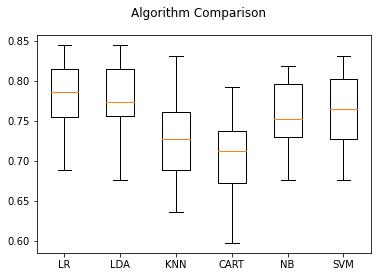

In [38]:
# prepare models
models = [('LR', LogisticRegression(max_iter=300)),
          ('LDA', LinearDiscriminantAnalysis()),
          ('KNN', KNeighborsClassifier()),
          ('CART', DecisionTreeClassifier()),
          ('NB', GaussianNB()),
          ('SVM', SVC())]

# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10)
    cv_results = cross_val_score(model, X_diab, Y_diab, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

<a id="check"></a>
<h5 style="text-decoration:underline">Regression Models</h5>

The following looks at seven regression algorithms that can be used to spot-check a dataset. 
- **Linear machine learning algorithms** 
    - **Linear Regression** - assumes a Gaussian distribution for the numeric input variables. It is also assumed that input variables are relevant to the output variable and that they are not highly correlated with each other
    - **Ridge Regression** - Ridge regression is an extension of linear regression where the loss function is modified to minimize the complexity of the model measured as the sum squared value of the coefficient values (also called the L2-norm).
    - **LASSO Linear Regression** - The Least Absolute Shrinkage and Selection Operator (or LASSO for short) is a modification of linear regression, like ridge regression, where the loss function is modified to minimize the complexity of the model measured as the sum absolute value of the coefficient values (also called the L1-norm).
    - **Elastic Net Regression** - ElasticNet is a form of regularization regression that combines the properties of both Ridge Regression and LASSO regression. It seeks to minimize the complexity of the regression model (magnitude and number of regression coefficients) by penalizing the model using both the L2-norm (sum squared coefficient values) and the L1-norm (sum absolute coefficient values).

    
- **Nonlinear machine learning algorithms**
    - **k-Nearest Neighbors** - The k-Nearest Neighbors algorithm (or KNN) locates the k most similar instances in the training dataset for a new data instance. From the k neighbors, a mean or median output variable is taken as the prediction. Of note is the distance metric used (the `metric` argument). The Minkowski distance is used by default, which is a generalization of both the Euclidean distance (used when all inputs have the same scale) and Manhattan distance (for when the scales of the input variables differ).
    - **Classification and Regression Trees** - Classification and Regression Trees (CART or just decision trees) construct a binary tree from the training data. Split points are chosen greedily by evaluating each attribute and each value of each attribute in the training data in order to minimize a cost function (like the Gini index).
    - **Support Vector Machines** - Support Vector Machines (or SVM) seek a line that best separates two classes. Those data instances that are closest to the line that best separates the classes are called support vectors and influence where the line is placed. SVM has been extended to support multiple classes. Of particular importance is the use of different kernel functions via the kernel parameter.

In [39]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

In [40]:
# LINEAR MODELS

model_1 = LinearRegression()

model_2 = Ridge()

model_3 = Lasso()

model_4 = ElasticNet()

kfold = KFold(n_splits=10)

results_1 = cross_val_score(model_1, X_hous, Y_hous, cv=kfold, scoring='neg_mean_squared_error')
results_2 = cross_val_score(model_2, X_hous, Y_hous, cv=kfold, scoring='neg_mean_squared_error')
results_3 = cross_val_score(model_3, X_hous, Y_hous, cv=kfold, scoring='neg_mean_squared_error')
results_4 = cross_val_score(model_4, X_hous, Y_hous, cv=kfold, scoring='neg_mean_squared_error')

print(f"Results for linear regression model: {results_1.mean():.4f} ({results_1.std():.4f})")
print(f"Results for ridge model: {results_2.mean():.4f} ({results_2.std():.4f})")
print(f"Results for lasso regression model: {results_3.mean():.4f} ({results_4.std():.4f})")
print(f"Results for elastic net model: {results_3.mean():.4f} ({results_4.std():.4f})")

Results for linear regression model: -34.7053 (45.5740)
Results for ridge model: -34.0782 (45.9000)
Results for lasso regression model: -34.4641 (22.7087)
Results for elastic net model: -34.4641 (22.7087)


In [41]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

In [42]:
# NON-LINEAR MODELS

model_1 = KNeighborsRegressor()

model_2 = DecisionTreeRegressor()

model_3 = SVR()

kfold = KFold(n_splits=10)

results_1 = cross_val_score(model_1, X_hous, Y_hous, cv=kfold, scoring='neg_mean_squared_error')
results_2 = cross_val_score(model_2, X_hous, Y_hous, cv=kfold, scoring='neg_mean_squared_error')
results_3 = cross_val_score(model_3, X_hous, Y_hous, cv=kfold, scoring='neg_mean_squared_error')

print(f"Results for k-Nearest Neighbors model: {results_1.mean():.4f} ({results_1.std():.4f})")
print(f"Results for Decision Tree model: {results_2.mean():.4f} ({results_2.std():.4f})")
print(f"Results for Support Vector Machines model: {results_3.mean():.4f} ({results_3.std():.4f})")

Results for k-Nearest Neighbors model: -107.2868 (79.8395)
Results for Decision Tree model: -33.6892 (26.4516)
Results for Support Vector Machines model: -72.2554 (61.9605)


<a id="auto"></a>
<h2 align="center">AUTOMATE MACHINE LEARNING WORKFLOWS WITH PIPELINES</h2>

There are standard workflows in a machine learning project that can be automated. Standard because they overcome common problems like data leakage in your test harness. Pipelines help to clearly define and automate these workflows. Pipelines work by allowing for a linear sequence of data transforms to be chained together culminating in a modeling process that can be evaluated. The goal is to ensure that all of the steps in the pipeline are constrained to the data available for the evaluation, such as the training dataset or each fold of the cross validation procedure.

<a id="pipe"></a>
<h3><ins>Data Preparation and Modeling Pipeline</ins></h3>

An easy trap to fall into in applied machine learning is leaking data from the training dataset to the test dataset. To avoid this trap we need a robust test harness with strong separation of training and testing. This includes data preparation. Data preparation is one easy way to leak knowledge of the whole training dataset to the algorithm. For example, preparing data using normalization or standardization on the entire training dataset before learning would not be a valid test because the training dataset would have been influenced by the scale of the data in the test set. Pipelines help prevent data leakage in the test set by ensuring that data preparation like standardization is constrained to each fold of the cross-validation procedure.

In [43]:
from sklearn.preprocessing import StandardScaler

In [44]:
# create pipeline
estimators = [('standardize', StandardScaler()),
             ('lda', LinearDiscriminantAnalysis())]

model = Pipeline(estimators)

# evaluate pipeline
kfold = KFold(n_splits=10)
results = cross_val_score(model, X_diab, Y_diab, cv=kfold)
print(results.mean())

0.773462064251538


**Note how the `Pipeline` itself is treated like an estimator and is evaluated in its entirety by the k-fold cross-validation procedure.**

<a id="extract"></a>
<h3><ins>Feature Extraction and Modeling Pipeline</ins></h3>

Feature extraction is another procedure that is susceptible to data leakage. Like data preparation, feature extraction procedures must be restricted to the data in the training dataset. The pipeline provides a handy tool called `FeatureUnion` which allows the results of multiple feature selection and extraction procedures to be combined into a larger dataset on which a model can be trained. Importantly, all the feature extraction and the feature union occurs within each fold of the cross validation procedure.

In [45]:
from sklearn.pipeline import FeatureUnion
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest

In [46]:
# create feature union
features = [('pca', PCA(n_components=3)),
           ('select_best', SelectKBest(k=6))]
feature_union = FeatureUnion(features)

# create pipeline
estimators = [('feature_union', feature_union),
             ('logistic', LogisticRegression(max_iter=300))]
model = Pipeline(estimators)

# evaluate pipeline
kfold = KFold(n_splits=10)
results = cross_val_score(model, X_diab, Y_diab, cv=kfold)

print(results.mean())

0.7760423786739576


Note how the `FeatureUnion` is it’s own Pipeline that in turn is a single step in the final Pipeline used to feed Logistic Regression. This introduces the idea of embedding pipelines within pipelines.

<a id="ensemble"></a>
<h2 align="center">IMPROVE PERFORMANCE WITH ENSEMBLES</h2>

Ensembles have the potential to give a boost in accuracy on a dataset.

The three most popular methods for combining the predictions from different ensemble models are:
- **Bagging** - Building multiple models (typically of the same type) from different subsamples of the training dataset.
- **Boosting** - Building multiple models (typically of the same type) each of which learns to fix the prediction errors of a prior model in the sequence of models.
- **Voting** - Building multiple models (typically of differing types) and simple statistics (like calculating the mean) are used to combine predictions.

<a id="bag"></a>
<h3><ins>Bagging Algorithms</ins></h3>

Bootstrap Aggregation (or Bagging) involves taking multiple samples from your training dataset (with replacement) and training a model for each sample. The final output prediction is averaged across the predictions of all of the sub-models. 
>**Bagging performs best with algorithms that have high variance.** 

<a id="bagtree"></a>
<h5 style="text-decoration:underline">Bagged Decision Trees</h5>

A popular example are **decision trees**, often constructed without pruning. 

In [47]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [48]:
kfold = KFold(n_splits=10)
model = DecisionTreeClassifier()

# create bagged classifier with a total of 100 trees
bagged_model = BaggingClassifier(base_estimator=model, n_estimators=100,
                                 random_state=7)
results = cross_val_score(bagged_model, X_diab, Y_diab, cv=kfold)

print(f"Results for bagged decision tree model: {results.mean():.4f} ({results.std():.4f})")

Results for bagged decision tree model: 0.7720 (0.0751)


<a id="forest"></a>
<h5 style="text-decoration:underline">Random Forest</h5>

**Random Forests** is an extension of bagged decision trees. Samples of the training dataset are taken with replacement, but the trees are constructed in a way that reduces the correlation between individual classifiers. Specifically, rather than greedily choosing the best split point in the construction of each tree, only a random subset of features are considered for each split.

In [49]:
from sklearn.ensemble import RandomForestClassifier

In [50]:
kfold = KFold(n_splits=10)
model = RandomForestClassifier(n_estimators=100, max_features=3)

results = cross_val_score(model, X_diab, Y_diab, cv=kfold)

print(f"Results for random forest model: {results.mean():.4f} ({results.std():.4f})")

Results for random forest model: 0.7668 (0.0673)


<a id="extra"></a>
<h5 style="text-decoration:underline">Extra Trees</h5>

**Extra Trees** are another modification of bagging where random trees are constructed from samples of the training dataset.

In [51]:
from sklearn.ensemble import ExtraTreesClassifier

In [52]:
kfold = KFold(n_splits=10)
model = ExtraTreesClassifier(n_estimators=100, max_features=3)

results = cross_val_score(model, X_diab, Y_diab, cv=kfold)

print(f"Results for random forest model: {results.mean():.4f} ({results.std():.4f})")

Results for random forest model: 0.7669 (0.0705)


<a id="boost"></a>
<h3><ins>Boosting Algorithms</ins></h3>

**Boosting ensemble algorithms** creates a sequence of models that attempt to correct the mistakes of the models before them in the sequence. Once created, the models make predictions which may be weighted by their demonstrated accuracy and the results are combined to create a final output prediction. 

<a id="ada"></a>
<h5 style="text-decoration:underline">AdaBoost</h5>

**AdaBoost** was perhaps the first successful boosting ensemble algorithm. It generally works by weighting instances in the dataset by how easy or difficult they are to classify, allowing the algorithm to pay less attention to them in the construction of subsequent models.

In [53]:
from sklearn.ensemble import AdaBoostClassifier

In [54]:
kfold = KFold(n_splits=10)
model = AdaBoostClassifier(n_estimators=30, random_state=7)

results = cross_val_score(model, X_diab, Y_diab, cv=kfold)

print(f"Results for ada boost model: {results.mean():.4f} ({results.std():.4f})")

Results for ada boost model: 0.7605 (0.0544)


<a id="gradient"></a>
<h5 style="text-decoration:underline">Stochastic Gradient Boosting</h5>

**Stochastic Gradient Boosting (or Gradient Boosting Machines)** are one of the most sophisticated ensemble techniques. It is also a technique that is proving to be perhaps one of the best techniques available for improving performance via ensembles.

In [55]:
from sklearn.ensemble import GradientBoostingClassifier

In [56]:
kfold = KFold(n_splits=10)
model = GradientBoostingClassifier(n_estimators=100, random_state=7)

results = cross_val_score(model, X_diab, Y_diab, cv=kfold)

print(f"Results for gradient boost model: {results.mean():.4f} ({results.std():.4f})")

Results for gradient boost model: 0.7682 (0.0558)


<a id="vote"></a>
<h3><ins>Voting Ensemble</ins></h3>

**Voting** is one of the simplest ways of combining the predictions from multiple machine learning algorithms. It works by first creating two or more standalone models from your training dataset. A Voting Classifier can then be used to wrap the models and average the predictions of the sub-models when asked to make predictions for new data. The predictions of the sub-models can be weighted, but specifying the weights for classifiers manually or even heuristically is difficult. More advanced methods can learn how to best weight the predictions from sub models, but this is called **stacking (stacked aggregation)** and is currently not provided in scikit-learn.

In [57]:
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

In [58]:
kfold = KFold(n_splits=10)

# create the sub models
estimators = [('logistic', LogisticRegression(max_iter=300)),
             ('cart', DecisionTreeClassifier()),
             ('svm', SVC())]

# create the ensemble model
ensemble = VotingClassifier(estimators)

results = cross_val_score(ensemble, X_diab, Y_diab, cv=kfold)

print(f"Results for voting model: {results.mean():.4f} ({results.std():.4f})")

Results for voting model: 0.7669 (0.0729)


<a id="tune"></a>
<h2 align="center">IMPROVE PERFORMANCE WITH ALGORITHM TUNING</h2>

Machine learning models are parameterized so that their behavior can be tuned for a given problem. Models can have many parameters and finding the best combination of parameters can be treated as a search problem.

Algorithm tuning is a final step in the process of applied machine learning before finalizing a model. It is sometimes called **hyperparameter optimization** where the algorithm parameters are referred to as hyperparameters, whereas the coefficients found by the machine learning algorithm itself are referred to as parameters. Optimization suggests the search-nature of the problem. Phrased as a search problem, you can use different search strategies to find a good and robust parameter or set of parameters for an algorithm on a given problem.

<a id="grid"></a>
<h3><ins>Grid Search Parameter Tuning</ins></h3>

**Grid search** is an approach to parameter tuning that will methodically build and evaluate a model for each combination of algorithm parameters specified in a grid.

In [59]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [60]:
alphas = [1,0.1,0.01,0.001,0.0001,0]

param_grid = dict(alpha=alphas)

model = Ridge()
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(X_diab, Y_diab)

print(grid.best_score_)
print(grid.best_estimator_.alpha)

0.27610844129292433
1


<a id="random"></a>
<h3><ins>Random Search Parameter Tuning</ins></h3>

**Random search** is an approach to parameter tuning that will sample algorithm parameters from a random distribution (i.e. uniform) for a fixed number of iterations. A model is constructed and evaluated for each combination of parameters chosen.

In [61]:
from scipy.stats import uniform
from sklearn.model_selection import RandomizedSearchCV

A total of 100 iterations are performed with uniformly random alpha values selected in the range between 0 and 1 (the range that alpha values can take).

In [62]:
param_grid = {'alpha': uniform()}
model = Ridge()
rsearch = RandomizedSearchCV(estimator=model, 
                             param_distributions=param_grid,
                             n_iter=100, random_state=7)
rsearch.fit(X_diab, Y_diab)
print(rsearch.best_score_)
print(rsearch.best_estimator_.alpha)

0.2761075573402853
0.9779895119966027


<a id="save"></a>
<h2 align="center">SAVE AND LOAD MACHINE LEARNING MODELS</h2>

Finding an accurate machine learning model is not the end of the project. It is necessary to save a machine learning model so that it can be used to make predictions.

<a id="pickle"></a>
<h3><ins>Finalize Your Model with pickle</ins></h3>

**Pickle** is the standard way of serializing objects in Python. We can use the `pickle` operation to serialize our machine learning algorithms and save the serialized format to a file. Later we can load this file to deserialize our model and use it to make new predictions.

In [63]:
from pickle import dump, load

In [64]:
X_train, X_test, Y_train, Y_test = train_test_split(X_diab, Y_diab,
                                                    test_size=0.33,
                                                    random_state=7)

# Fit the model on the training set
model = LogisticRegression(max_iter=300)
model.fit(X_train, Y_train)

# save the model
filename = 'finalized_model_pickle.sav'
dump(model, open(filename, 'wb'))

# load the model
loaded_model = load(open(filename, 'rb'))
result = loaded_model.score(X_test, Y_test)
print(result)

0.7874015748031497


<a id="joblib"></a>
<h3><ins>Finalize Your Model with Joblib</ins></h3>

The **`Joblib2`** library is part of the SciPy ecosystem and provides utilities for pipelining Python jobs. It provides utilities for saving and loading Python objects that make use of NumPy data structures, efficiently. This can be useful for some machine learning algorithms that require a lot of parameters or store the entire dataset (e.g. k-Nearest Neighbors).

In [65]:
import joblib

In [66]:
X_train, X_test, Y_train, Y_test = train_test_split(X_diab, Y_diab,
                                                    test_size=0.33,
                                                    random_state=7)
# Fit the model on the training set
model = LogisticRegression(max_iter=300)
model.fit(X_train, Y_train)

# save the model
filename = 'finalized_model_joblib.sav'
dump(model, open(filename, 'wb'))

# load the model
loaded_model = load(open(filename, 'rb'))
result = loaded_model.score(X_test, Y_test)
print(result)

0.7874015748031497


<a id="ref"></a>
<h3><ins>REFERENCES</ins></h3>

<ins>BOOKS</ins>
- [Machine Learning Algorithms From Scratch by Jason Brownlee](https://machinelearningmastery.com/machine-learning-algorithms-from-scratch/)
- [Data Preparation for Machine Learning by Jason Brownlee](https://machinelearningmastery.com/data-preparation-for-machine-learning/)


<ins>ARTICLES / WEBSITES</ins>
- [Towards Data Science - Choosing a Baseline Accuracy for a Classification Model](https://towardsdatascience.com/calculating-a-baseline-accuracy-for-a-classification-model-a4b342ceb88f)

<ins>PYTHON PACKAGES</ins>
- [Scikit Learn - Cross-validation: evaluating estimator performance](https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation)
- [Scikit Learn - Dummy (baseline) Estimators](https://scikit-learn.org/stable/modules/model_evaluation.html#dummy-estimators)
